This notebook exists to allow investiagtion into the filters to put the raw database through.

In [4]:
%run "Database_Filtering.ipynb" #allowing access to data filtering notebook
import matplotlib.pyplot as plt

100%|████████████████████████████████████████████████████████████████████████████████| 549/549 [00:08<00:00, 63.73it/s]


In [5]:
print('Number of ECGs within the database: ', len(patients))

Number of ECGs within the database:  549


As we can see from above there are 549 total ECGs within the unfiltered database. We can see how modifying the code below can lead to changes in the amount of patients that are allowed to pass through to analysis.

In [8]:
age_meta_idx = 0
smoking_meta_idx = 8
gender_meta_idx = 1
diagnosis_meta_idx = 4
previous_label = 'n/a'

#definite application
duplicate_data_filtering = True
sample_length = 120000


age_data_filtering = True
smoking_data_filtering = False #smoking filter gets rid of alot of healthy patients -leaves only 3 remaining
gender_data_filtering = True

#156 people and 3 healthy if all filters applied

test_allowed_patients = PatientCollection()

for i in range(0, len(patients)):
    #creating new patient instance
    test_Patient = Patient(None, None, None, None, None, None)
    test_Patient.set_desired_sample_length(sample_length)
    
    #setting bool to true unless conditions for appending is not met
    append = True
    
    #try and except clause to ensure only ECGs longer than the minimum length are kept
    try:
        record = wfdb.rdrecord('C:\\Users\\court\\Documents\\masters\\solo project\\ES98C-ECG-Project\\ptb-diagnostic-ecg-database-1.0.0\\ptb-diagnostic-ecg-database-1.0.0\\' + patients[i], channel_names = test_Patient.get_channel_names(), sampto = test_Patient.get_desired_sample_length())
        #append ECG data to Patient instance
        test_Patient.set_ecg_data(record)
        
        test_Patient.set_docstring(patients[i])
        
        #labelling the diagnosis within the class
        if record.comments[diagnosis_meta_idx][22:] not in test_allowed_patients.get_diagnosis_list():
            append = False
        else:
            test_Patient.set_diagnosis(record.comments[diagnosis_meta_idx][22:])
            
        #labelling the health state of each patient class
        if record.comments[diagnosis_meta_idx][22:] == 'Healthy control':
            test_Patient.set_health_state('Healthy')
        else:
            test_Patient.set_health_state('Unhealthy')
        
        if age_data_filtering:
            #making sure age meta data is available
            if record.comments[age_meta_idx] == None:
                append = False
            else:
                test_Patient.set_age(int(record.comments[age_meta_idx][5:]))
                
        if smoking_data_filtering:
            #ensuring smoking meta data is available
            print(record.comments[smoking_meta_idx][8:])
            if record.comments[smoking_meta_idx][8:] not in ('yes', 'no'):
                append = False
            else:
                test_Patient.set_smoker_status(record.comments[smoking_meta_idx][8:])
                
        if gender_data_filtering:
            #ensuring gender meta data is available
            if record.comments[gender_meta_idx][5:] not in ('male', 'female'):
                append = False
            else:
                test_Patient.set_gender(record.comments[gender_meta_idx][5:])
            
        if duplicate_data_filtering:
            #only appending the first ECG from each patient to remove duplicates
            patient_number = patients[i][:10]
            if patient_number == previous_label:
                append = False
            else:
                previous_label = patient_number
                test_Patient.set_name(patients[i][:10])
                    
        if append:
            test_allowed_patients.add_patient(test_Patient)
        
    except ValueError as ve:
        None
        #print(f"Error reading record for patient {patients[i]}: {ve}")


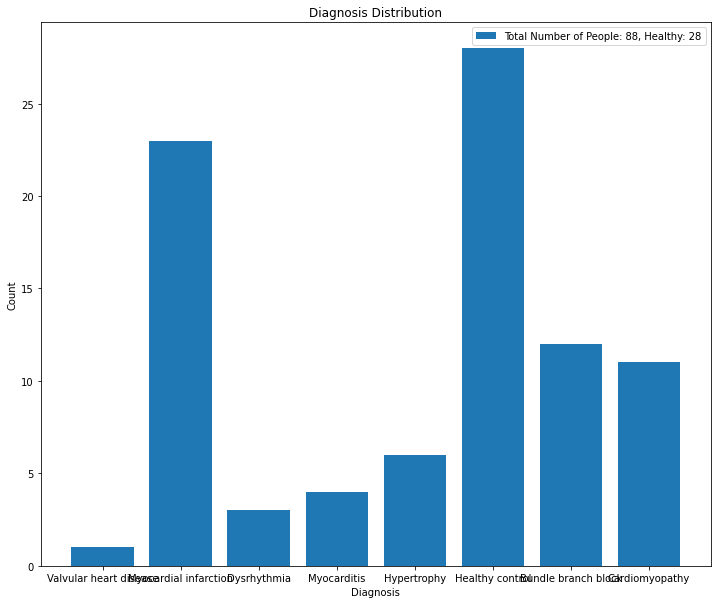

In [9]:
test_allowed_patients.plot_diagnosis()

In [34]:
#possibly group least common illnesses into 'other' group
#plot the distributions of meta data within the database
#include everything within the classes??

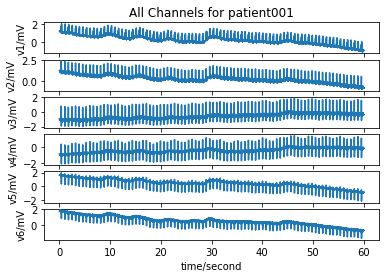

In [35]:
patient1 = test_allowed_patients.get_patient(0)
patient1.plot_ecg()


Applying the above filters, roughly halves the amount of ECGs in the database.

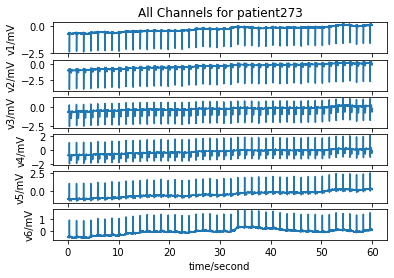

In [36]:
test_allowed_patients.plot_sample_ecg()

In [37]:
records = test_allowed_patients.get_records()


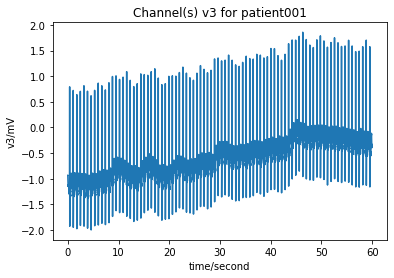

In [38]:
test_allowed_patients.get_patient(0).plot_channels(['v3'])


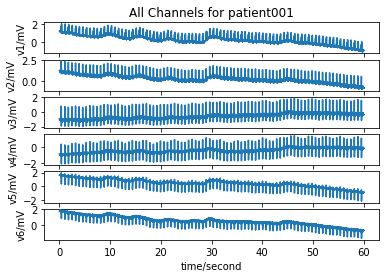

In [39]:
test_allowed_patients.get_patient(0).plot_ecg()